## 0. Import Python Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, make_scorer, roc_curve
from sklearn.inspection import PartialDependenceDisplay

## 1. Import data and clean

In [2]:
# creating a data frame
df = pd.read_csv("HH_Dataset.csv")

df 

,timestamp,date,time,_id,sensor,Temperature,Occupancy,Light Level,Relative Humidity,Noise Level,Pressure
0,1.470000e+12,01/09/2016,14:26:40,0893039bd49df685c1cabf397047fd9f,H002LSW,23.5,Unoccupied,4.26,45.6,35,1011.277568
1,1.470000e+12,01/09/2016,14:26:40,0893039bd49df685c1cabf3970acd9d4,H002LNW,23.4,Unoccupied,0.00,37.6,35,1013.302419
2,1.470000e+12,01/09/2016,17:13:20,07751307ee54ed5f0ed2e6ff5a5f022c,H002LNW,23.2,Unoccupied,0.00,37.6,35,1012.818658
3,1.470000e+12,01/09/2016,17:13:20,07751307ee54ed5f0ed2e6ff5a9b17f3,H002LNW,23.2,Unoccupied,0.00,37.6,35,1012.818658
4,1.470000e+12,01/09/2016,17:13:20,07751307ee54ed5f0ed2e6ff5aecf57e,H002LSW,22.6,Unoccupied,0.29,45.4,35,1010.561882
...,...,...,...,...,...,...,...,...,...,...,...
19995,1.480000e+12,16/01/2017,12:33:20,0073708a0149300195de2f6d23460e7b,H013LSE,22.0,Occupied,0.42,32.9,48,1016.971276
19996,1.480000e+12,16/01/2017,12:33:20,0073708a0149300195de2f6d2352619d,H019LN,18.5,Unoccupied,0.00,41.5,40,1027.837313
19997,1.480000e+12,16/01/2017,12:33:20,03256eb81e1766d99958453c9bd64d0d,H013LNE,17.1,Unoccupied,1.08,45.1,40,1026.894572
19998,1.480000e+12,16/01/2017,12:33:20,03256eb81e1766d99958453c9bd657be,H019LN,18.5,Unoccupied,0.00,43.4,41,1027.938113


In [3]:
df = df.drop(columns=['timestamp', 'date', 'time', '_id', 'sensor'])
df

,Temperature,Occupancy,Light Level,Relative Humidity,Noise Level,Pressure
0,23.5,Unoccupied,4.26,45.6,35,1011.277568
1,23.4,Unoccupied,0.00,37.6,35,1013.302419
2,23.2,Unoccupied,0.00,37.6,35,1012.818658
3,23.2,Unoccupied,0.00,37.6,35,1012.818658
4,22.6,Unoccupied,0.29,45.4,35,1010.561882
...,...,...,...,...,...,...
19995,22.0,Occupied,0.42,32.9,48,1016.971276
19996,18.5,Unoccupied,0.00,41.5,40,1027.837313
19997,17.1,Unoccupied,1.08,45.1,40,1026.894572
19998,18.5,Unoccupied,0.00,43.4,41,1027.938113


In [4]:
df.drop_duplicates(inplace=True)
df

,Temperature,Occupancy,Light Level,Relative Humidity,Noise Level,Pressure
0,23.5,Unoccupied,4.26,45.6,35,1011.277568
1,23.4,Unoccupied,0.00,37.6,35,1013.302419
2,23.2,Unoccupied,0.00,37.6,35,1012.818658
4,22.6,Unoccupied,0.29,45.4,35,1010.561882
6,23.5,Unoccupied,4.52,45.6,35,1010.985257
...,...,...,...,...,...,...
19994,16.1,Unoccupied,0.00,40.2,35,1026.715079
19995,22.0,Occupied,0.42,32.9,48,1016.971276
19996,18.5,Unoccupied,0.00,41.5,40,1027.837313
19997,17.1,Unoccupied,1.08,45.1,40,1026.894572


In [5]:
df.isnull().sum() # check for missing values

Temperature           6
Occupancy             0
Light Level          70
Relative Humidity     0
Noise Level           0
Pressure              0
dtype: int64

In [6]:
df.dropna(inplace=True)

df

,Temperature,Occupancy,Light Level,Relative Humidity,Noise Level,Pressure
0,23.5,Unoccupied,4.26,45.6,35,1011.277568
1,23.4,Unoccupied,0.00,37.6,35,1013.302419
2,23.2,Unoccupied,0.00,37.6,35,1012.818658
4,22.6,Unoccupied,0.29,45.4,35,1010.561882
6,23.5,Unoccupied,4.52,45.6,35,1010.985257
...,...,...,...,...,...,...
19994,16.1,Unoccupied,0.00,40.2,35,1026.715079
19995,22.0,Occupied,0.42,32.9,48,1016.971276
19996,18.5,Unoccupied,0.00,41.5,40,1027.837313
19997,17.1,Unoccupied,1.08,45.1,40,1026.894572


## 2. Generate new variables in dataset

In [7]:
df['Sensor-based Occupancy'] = df['Occupancy'].astype('category')
df = df.drop(columns='Occupancy')

df

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure,Sensor-based Occupancy
0,23.5,4.26,45.6,35,1011.277568,Unoccupied
1,23.4,0.00,37.6,35,1013.302419,Unoccupied
2,23.2,0.00,37.6,35,1012.818658,Unoccupied
4,22.6,0.29,45.4,35,1010.561882,Unoccupied
6,23.5,4.52,45.6,35,1010.985257,Unoccupied
...,...,...,...,...,...,...
19994,16.1,0.00,40.2,35,1026.715079,Unoccupied
19995,22.0,0.42,32.9,48,1016.971276,Occupied
19996,18.5,0.00,41.5,40,1027.837313,Unoccupied
19997,17.1,1.08,45.1,40,1026.894572,Unoccupied


In [8]:
df["Sensor-based Occupancy"].value_counts()

Unoccupied    10621
Occupied       1682
Name: Sensor-based Occupancy, dtype: int64

## 3. Exploratory data analysis

### 3.1 Definition of input and target variables


In [9]:
y = 'Sensor-based Occupancy'
X = [name for name in df.columns if name not in y]
print('y =', y)
print('X =', X)

y = Sensor-based Occupancy
X = ['Temperature', 'Light Level', 'Relative Humidity', 'Noise Level', 'Pressure']


### 3.2 Display descriptive statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12303 entries, 0 to 19998
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Temperature             12303 non-null  float64 
 1   Light Level             12303 non-null  float64 
 2   Relative Humidity       12303 non-null  float64 
 3   Noise Level             12303 non-null  int64   
 4   Pressure                12303 non-null  float64 
 5   Sensor-based Occupancy  12303 non-null  category
dtypes: category(1), float64(4), int64(1)
memory usage: 588.8 KB


In [11]:
df.describe()

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure
count,12303.000000,12303.000000,12303.000000,12303.000000,12303.000000
mean,18.962058,0.595959,39.731740,37.005202,1021.252406
std,2.908262,10.501225,8.955741,7.259456,12.680292
min,-1.900000,0.000000,0.000000,0.000000,967.613940
25%,16.900000,0.000000,33.300000,35.000000,1013.201925
50%,19.200000,0.000000,39.300000,35.000000,1022.002465
75%,21.000000,0.160000,45.650000,35.000000,1028.541690
max,38.200000,760.150000,67.800000,256.000000,1065.056491


### 3.3 Visualise the properties of input and target variables 

#### 3.3.1 Boxplots for individual features in relation to the target

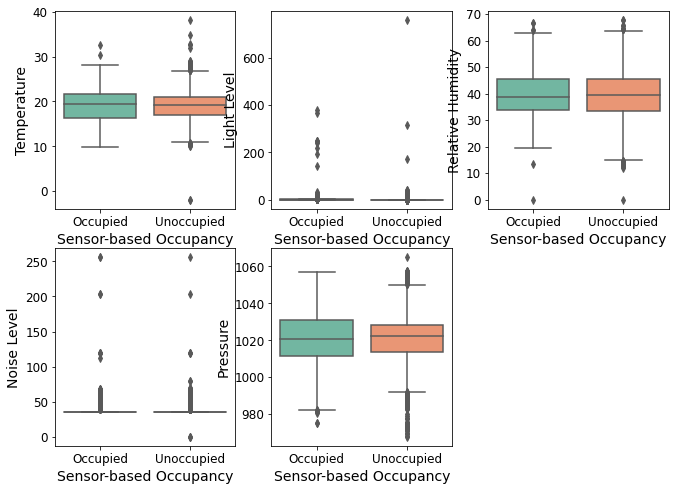

In [12]:
MEDIUM_SIZE = 14
SMALL_SIZE = 12
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  

fig, axes = plt.subplots(2, 3, figsize=(11, 8))

axes[1][2].set_visible(False)
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Temperature'], palette="Set2", ax=axes[0, 0])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Light Level'], palette="Set2", ax=axes[0, 1])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Relative Humidity'], palette="Set2", ax=axes[0, 2])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Noise Level'], palette="Set2", ax=axes[1, 0])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Pressure'], palette="Set2", ax=axes[1, 1])

plt.savefig("boxplots_before.png", dpi=150, bbox_inches='tight')

#### 3.3.2 Further data cleaning by removing outliers

In [13]:
df[df.Temperature < 5]

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure,Sensor-based Occupancy
1369,-1.9,0.44,51.9,62,1010.331460,Unoccupied
3285,-1.9,2.86,40.4,41,1015.421912,Unoccupied


In [14]:
df[df["Relative Humidity"] < 5]

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure,Sensor-based Occupancy
9755,20.4,0.18,0.0,35,983.380679,Occupied
14890,16.6,0.00,0.0,35,1023.426774,Unoccupied


In [15]:
df[df["Noise Level"] < 10]

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure,Sensor-based Occupancy
1367,22.7,0.26,58.8,0,1010.753246,Unoccupied
1368,22.5,0.10,56.8,0,999.488939,Unoccupied
3404,18.2,0.00,42.0,0,1026.158686,Unoccupied


In [16]:
df = df[df.Temperature > 0]
df = df[df["Relative Humidity"] > 0]
df = df[df["Noise Level"] > 0]

df

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure,Sensor-based Occupancy
0,23.5,4.26,45.6,35,1011.277568,Unoccupied
1,23.4,0.00,37.6,35,1013.302419,Unoccupied
2,23.2,0.00,37.6,35,1012.818658,Unoccupied
4,22.6,0.29,45.4,35,1010.561882,Unoccupied
6,23.5,4.52,45.6,35,1010.985257,Unoccupied
...,...,...,...,...,...,...
19994,16.1,0.00,40.2,35,1026.715079,Unoccupied
19995,22.0,0.42,32.9,48,1016.971276,Occupied
19996,18.5,0.00,41.5,40,1027.837313,Unoccupied
19997,17.1,1.08,45.1,40,1026.894572,Unoccupied


In [17]:
df.describe()

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure
count,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000
mean,18.964997,0.595986,39.734035,37.012199,1021.258897
std,2.896407,10.504189,8.940268,7.234829,12.676843
min,9.800000,0.000000,12.100000,35.000000,967.613940
25%,16.900000,0.000000,33.300000,35.000000,1013.204156
50%,19.200000,0.000000,39.300000,35.000000,1022.007706
75%,21.000000,0.160000,45.600000,35.000000,1028.546088
max,38.200000,760.150000,67.800000,256.000000,1065.056491


In [18]:
df["Sensor-based Occupancy"].value_counts()

Unoccupied    10615
Occupied       1681
Name: Sensor-based Occupancy, dtype: int64

#### 3.3.3 Recreate boxplots

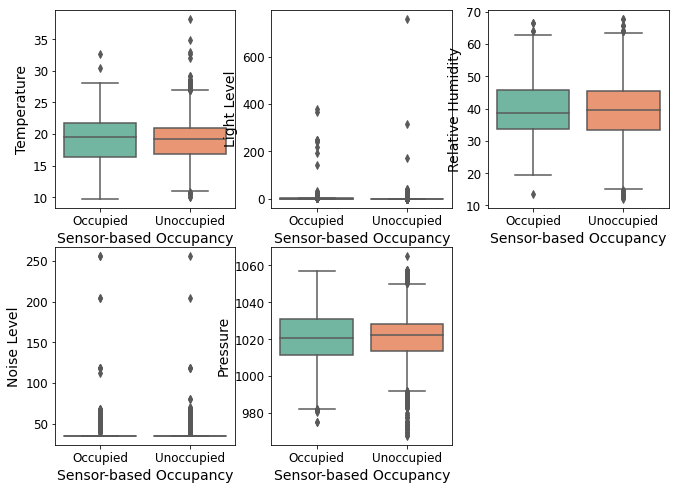

In [19]:
MEDIUM_SIZE = 14
SMALL_SIZE = 12
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  

fig, axes = plt.subplots(2, 3, figsize=(11, 8))

axes[1][2].set_visible(False)
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Temperature'], palette="Set2", ax=axes[0, 0])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Light Level'], palette="Set2", ax=axes[0, 1])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Relative Humidity'], palette="Set2", ax=axes[0, 2])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Noise Level'], palette="Set2", ax=axes[1, 0])
sns.boxplot(x=df['Sensor-based Occupancy'], y=df['Pressure'], palette="Set2", ax=axes[1, 1])
plt.savefig("boxplots.png", dpi=150, bbox_inches='tight')

#### 3.3.4 Encode categorical target variable

In [20]:
occupancy_encoding = dict(enumerate(df["Sensor-based Occupancy"].cat.categories))
df["Sensor-based Occupancy"] = df["Sensor-based Occupancy"].cat.codes

print(occupancy_encoding)
df

{0: 'Occupied', 1: 'Unoccupied'}


,Temperature,Light Level,Relative Humidity,Noise Level,Pressure,Sensor-based Occupancy
0,23.5,4.26,45.6,35,1011.277568,1
1,23.4,0.00,37.6,35,1013.302419,1
2,23.2,0.00,37.6,35,1012.818658,1
4,22.6,0.29,45.4,35,1010.561882,1
6,23.5,4.52,45.6,35,1010.985257,1
...,...,...,...,...,...,...
19994,16.1,0.00,40.2,35,1026.715079,1
19995,22.0,0.42,32.9,48,1016.971276,0
19996,18.5,0.00,41.5,40,1027.837313,1
19997,17.1,1.08,45.1,40,1026.894572,1


#### 3.3.5 Calculate Pearson correlation

In [21]:
def f_pearsoncorr(x, y, hue=None, ax=None, **kws):
  r,_ = pearsonr(x, y)
  ax = ax or plt.gca()
  label = r'$\rho$ = ' + str(round(r, 3))
  ax.annotate(label, xy=(.1, .9), size=20, xycoords=ax.transAxes)

#### 3.3.6 Visualise data with pair plots

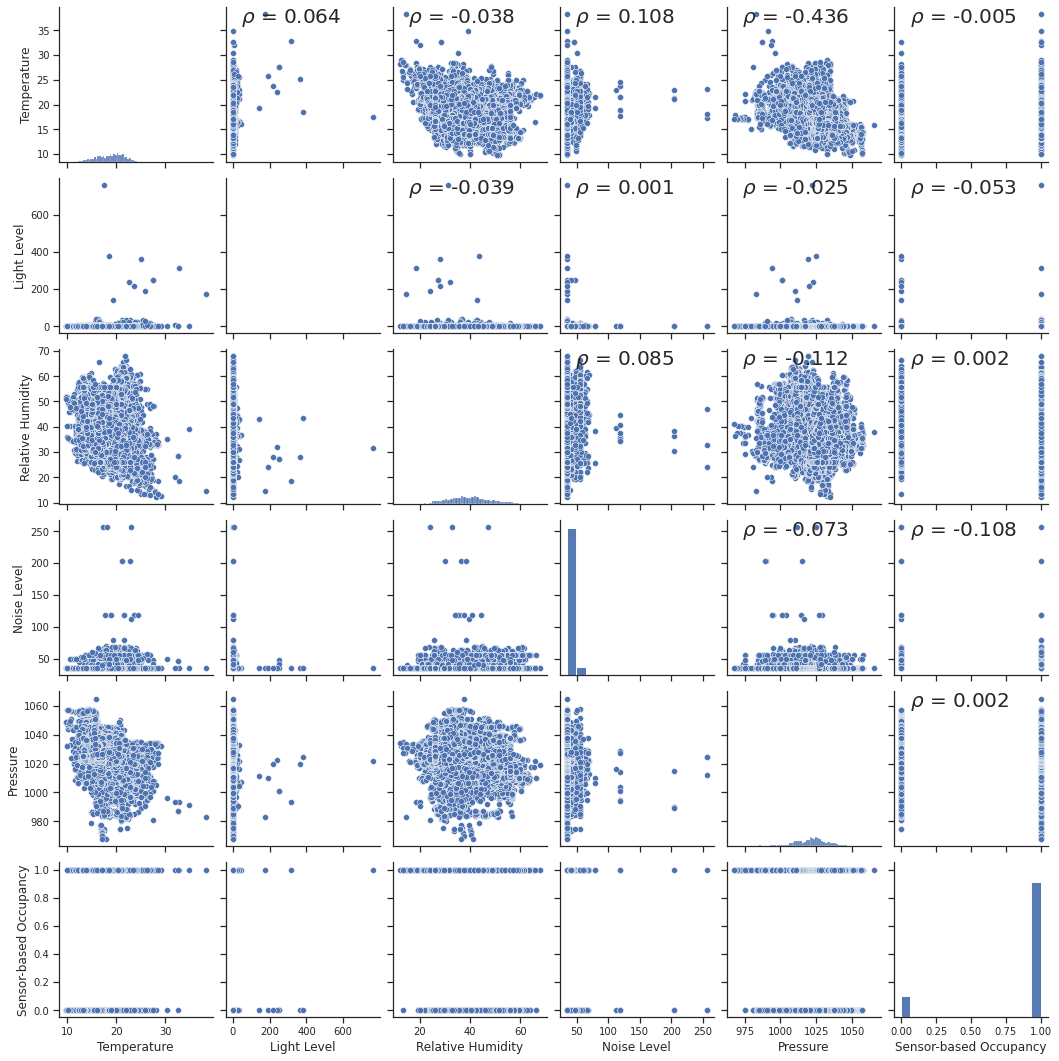

In [ ]:
sns.set(style="ticks", color_codes=True)

MEDIUM_SIZE = 12
SMALL_SIZE = 10
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  

g = sns.pairplot(df)
g.map_diag(sns.histplot)
g.map_upper(f_pearsoncorr)
plt.savefig("scatterplot_matrix.png", dpi=150, bbox_inches='tight')

## Classification models to predict the sensor-based occupancy

### 4.1 Split data into training and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, X], df.loc[:, y])

# summarize split
print('Train data rows = %d, columns = %d' % (X_train.shape[0], X_train.shape[1]))
print('Test data rows = %d, columns = %d' % (X_test.shape[0], X_test.shape[1]))

Train data rows = 9222, columns = 5
Test data rows = 3074, columns = 5


In [23]:
y_test.value_counts()

1    2621
0     453
Name: Sensor-based Occupancy, dtype: int64

In [24]:
X_test.head(10)

,Temperature,Light Level,Relative Humidity,Noise Level,Pressure
518,21.8,0.00,55.4,35,996.234938
5801,19.0,0.73,40.1,35,1010.644529
7358,20.6,0.00,24.7,35,1025.181865
3931,22.9,0.00,34.9,42,1027.155515
5451,24.1,0.03,31.2,35,1006.786055
9387,21.1,0.00,34.3,35,992.578774
15395,19.5,0.00,39.2,35,1021.373040
18080,15.2,0.53,30.5,35,1046.203726
17828,14.5,0.00,32.4,35,1037.724218
641,21.8,0.00,54.2,35,1014.473052


### 4.2 Standardise data

In [25]:
input_scaler = StandardScaler()

X_train_scl = input_scaler.fit_transform(X_train.values)
X_test_scl = input_scaler.transform(X_test.values)

### 4.3 k-Nearest Neighbors

#### 4.3.1 Train KNN classification model

In [26]:
param_grid = {'n_neighbors': range(1, 11, 1),
              'leaf_size': range(1, 51, 1)} 
knnc = KNeighborsClassifier()
knn_clf = RandomizedSearchCV(estimator=knnc, param_distributions=param_grid, scoring='balanced_accuracy', verbose=3, n_jobs=1)

# feed the model with training sets and train
knn_clf.fit(X_train_scl, y_train)

# predict on the test set
y_pred = knn_clf.best_estimator_.predict(X_test_scl)

# save the classifier
with open('knn_model.pkl', 'wb') as fid:
    pickle.dump(knn_clf.best_estimator_, fid)

print('Best KNN estimator found by random search: {}'.format(knn_clf.best_estimator_))
print('Balanced accuracy on test set: {:0.3f}'.format(balanced_accuracy_score(y_test, y_pred)))
print('ROC AUC on test set: {:0.3f}'.format(roc_auc_score(y_test, y_pred)))
print('F1 score on test set: {:0.3f}'.format(f1_score(y_test, y_pred)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........leaf_size=7, n_neighbors=9;, score=0.587 total time=   0.1s
[CV 2/5] END ........leaf_size=7, n_neighbors=9;, score=0.607 total time=   0.1s
[CV 3/5] END ........leaf_size=7, n_neighbors=9;, score=0.580 total time=   0.1s
[CV 4/5] END ........leaf_size=7, n_neighbors=9;, score=0.571 total time=   0.1s
[CV 5/5] END ........leaf_size=7, n_neighbors=9;, score=0.580 total time=   0.1s
[CV 1/5] END ........leaf_size=7, n_neighbors=6;, score=0.649 total time=   0.1s
[CV 2/5] END ........leaf_size=7, n_neighbors=6;, score=0.669 total time=   0.1s
[CV 3/5] END ........leaf_size=7, n_neighbors=6;, score=0.624 total time=   0.1s
[CV 4/5] END ........leaf_size=7, n_neighbors=6;, score=0.641 total time=   0.1s
[CV 5/5] END ........leaf_size=7, n_neighbors=6;, score=0.664 total time=   0.1s
[CV 1/5] END ........leaf_size=8, n_neighbors=7;, score=0.606 total time=   0.1s
[CV 2/5] END ........leaf_size=8, n_neighbors=7;

### 4.4 Random Forest

#### 4.4.1 Train RF classification model

In [27]:
param_grid = {'n_estimators': range(100, 501, 9), 
              'max_features': range(1, 6, 1),
              'max_depth': range(10, 21, 1),
              } 
svc = RandomForestClassifier()
rf_clf = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, scoring='balanced_accuracy', verbose=3, n_jobs=1)

# feed the model with training sets and train
rf_clf.fit(X_train_scl, y_train)

# predict on the test set
y_pred = rf_clf.best_estimator_.predict(X_test_scl)

# save the classifier
with open('rf_model.pkl', 'wb') as fid:
    pickle.dump(rf_clf.best_estimator_, fid)   

print('Best RF estimator found by random search: {}'.format(rf_clf.best_estimator_))
print('Balanced accuracy on test set: {:0.3f}'.format(balanced_accuracy_score(y_test, y_pred)))
print('ROC AUC on test set: {:0.3f}'.format(roc_auc_score(y_test, y_pred)))
print('F1 score on test set: {:0.3f}'.format(f1_score(y_test, y_pred)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, max_features=1, n_estimators=127;, score=0.550 total time=   0.7s
[CV 2/5] END max_depth=10, max_features=1, n_estimators=127;, score=0.552 total time=   0.7s
[CV 3/5] END max_depth=10, max_features=1, n_estimators=127;, score=0.562 total time=   0.7s
[CV 4/5] END max_depth=10, max_features=1, n_estimators=127;, score=0.584 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=1, n_estimators=127;, score=0.563 total time=   0.6s
[CV 1/5] END max_depth=16, max_features=5, n_estimators=244;, score=0.624 total time=   4.4s
[CV 2/5] END max_depth=16, max_features=5, n_estimators=244;, score=0.636 total time=   4.7s
[CV 3/5] END max_depth=16, max_features=5, n_estimators=244;, score=0.613 total time=   4.5s
[CV 4/5] END max_depth=16, max_features=5, n_estimators=244;, score=0.658 total time=   4.3s
[CV 5/5] END max_depth=16, max_features=5, n_estimators=244;, score=0.647 total time=   4.6s
[CV 1/5] 

#### 4.5 Confusion Matrix

In [38]:
# load it again
with open('rf_model.pkl', 'rb') as fid:
    rf_clf = pickle.load(fid)

In [39]:
# load it again
with open('knn_model.pkl', 'rb') as fid:
    knn_clf = pickle.load(fid)

In [40]:
y_pred = rf_clf.predict(X_test_scl)
rf_cm = confusion_matrix(y_test, y_pred)

In [41]:
y_pred = knn_clf.predict(X_test_scl)
knn_cm = confusion_matrix(y_test, y_pred)

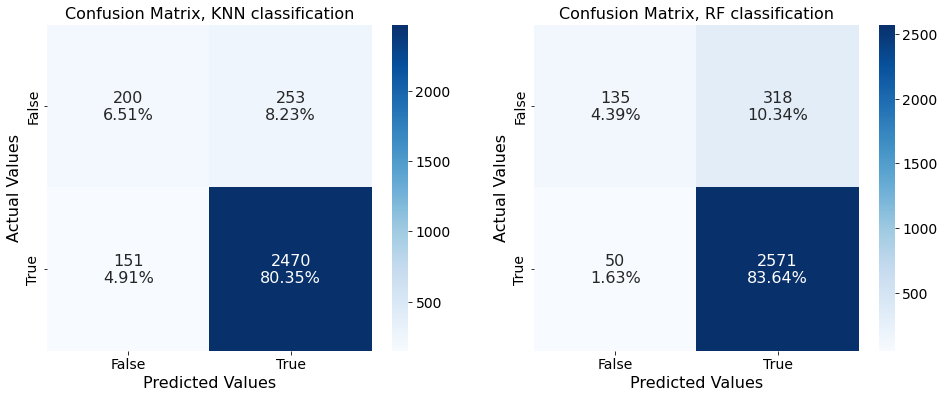

In [42]:
group_counts_rf = ['{0:0.0f}'.format(value) for value in
                rf_cm.flatten()]
group_percentages_rf = ['{0:.2%}'.format(value) for value in
                     rf_cm.flatten()/np.sum(rf_cm)]
labels_rf = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts_rf, group_percentages_rf)]
labels_rf = np.asarray(labels_rf).reshape(2,2)


group_counts_knn = ['{0:0.0f}'.format(value) for value in
                knn_cm.flatten()]
group_percentages_knn = ['{0:.2%}'.format(value) for value in
                     knn_cm.flatten()/np.sum(knn_cm)]
labels_knn = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts_knn, group_percentages_knn)]
labels_knn = np.asarray(labels_knn).reshape(2,2)

MEDIUM_SIZE = 16
SMALL_SIZE = 14
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax0 = sns.heatmap(rf_cm, annot=labels_rf, fmt='', cmap='Blues', ax=axes[1])
ax0.set_xlabel('Predicted Values')
ax0.set_ylabel('Actual Values');
ax0.set_title('Confusion Matrix, RF classification');

## Ticket labels - List must be in alphabetical order
ax0.xaxis.set_ticklabels(['False','True'])
ax0.yaxis.set_ticklabels(['False','True'])

ax1 = sns.heatmap(knn_cm, annot=labels_knn, fmt='', cmap='Blues', ax=axes[0])
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values');
ax1.set_title('Confusion Matrix, KNN classification');

## Ticket labels - List must be in alphabetical order
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
fig.savefig("confusion_matrix.png", dpi=150, bbox_inches='tight')
fig.show()

# 5. Machine Learning Interpretability

#### 5.1 Global Feature importance plot

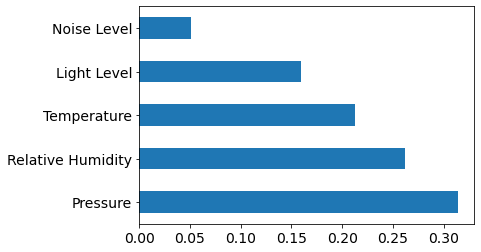

In [43]:
pd.Series(abs(rf_clf.feature_importances_), index=X).nlargest(10).plot(kind='barh')
plt.savefig("rf_feature_importance.png", dpi=150, bbox_inches='tight')

## 5.2 Partial dependence plot (PDP)

### 5.2.1 Plot the one-way PDP for the KNNC model

In [ ]:
print('Computing partial dependence plots...')

feature_name = X;

# Temperature	 			
PartialDependenceDisplay.from_estimator(knn_clf, X_test_scl, ['Temperature'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Light Level
PartialDependenceDisplay.from_estimator(knn_clf, X_test_scl, ['Light Level'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Relative Humidity
PartialDependenceDisplay.from_estimator(knn_clf, X_test_scl, ['Relative Humidity'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Noise Level
PartialDependenceDisplay.from_estimator(knn_clf, X_test_scl, ['Noise Level'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Pressure
PartialDependenceDisplay.from_estimator(knn_clf, X_test_scl, ['Pressure'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

### 5.2.2 Plot the one-way PDP for the RFC model

Computing partial dependence plots...


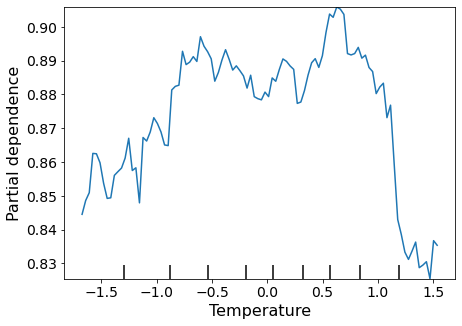

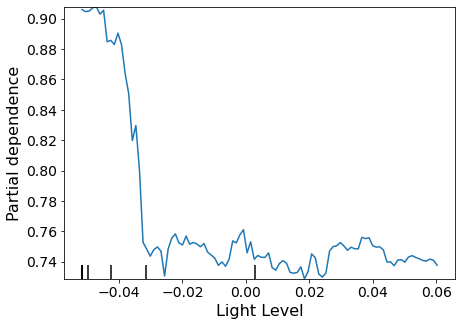

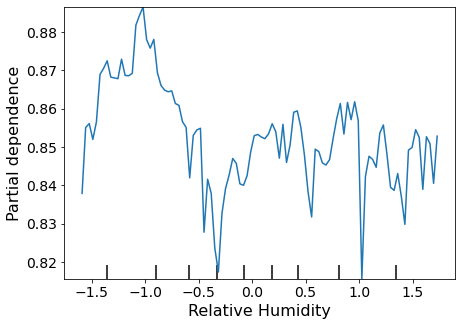

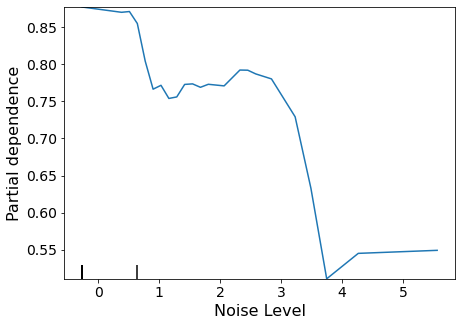

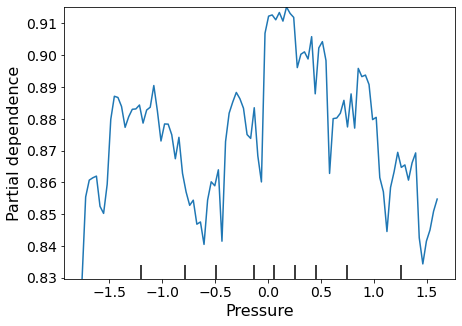

In [ ]:
print('Computing partial dependence plots...')

feature_name = X;


# Temperature	 			
PartialDependenceDisplay.from_estimator(rf_clf, X_test_scl, ['Temperature'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Light Level
PartialDependenceDisplay.from_estimator(rf_clf, X_test_scl, ['Light Level'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Relative Humidity
PartialDependenceDisplay.from_estimator(rf_clf, X_test_scl, ['Relative Humidity'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Noise Level
PartialDependenceDisplay.from_estimator(rf_clf, X_test_scl, ['Noise Level'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

# Pressure
PartialDependenceDisplay.from_estimator(rf_clf, X_test_scl, ['Pressure'], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)

### 5.2.3 Plot two-way partial dependence with contour/grid plot for the KNNC model

In [ ]:
# PDP interact for two features with contour plot 
PartialDependenceDisplay.from_estimator(knn_clf, X_test_scl,  [('Relative Humidity', 'Pressure')], feature_names=X, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.suptitle('Two-way Partial Dependence Plot, KNN Classification')
plt.savefig("knn_pdp.png", dpi=150, bbox_inches='tight')

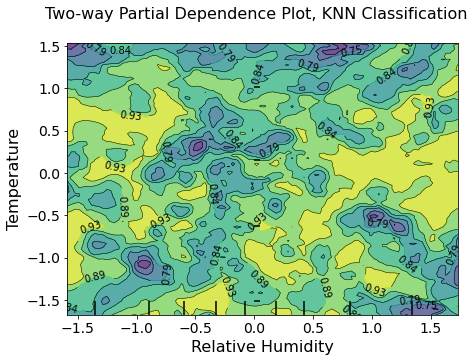

In [ ]:
# PDP interact for two features with contour plot
PartialDependenceDisplay.from_estimator(knn_clf, X_test_scl,  [('Relative Humidity', 'Temperature')], feature_names=feature_name, n_jobs=-1)

fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.suptitle('Two-way Partial Dependence Plot, KNN Classification')
plt.savefig("knn_pdp1.png", dpi=150, bbox_inches='tight')

### 5.2.4 Plot two-way partial dependence with contour/grid plot for the RFC model

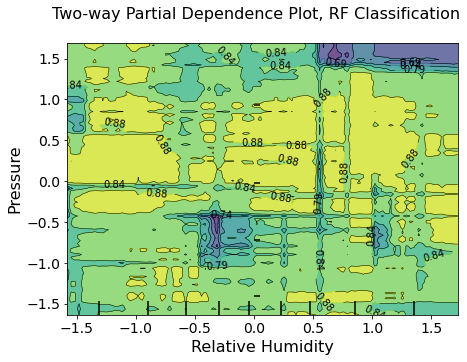

In [46]:
# PDP interact for two features with contour plot
PartialDependenceDisplay.from_estimator(rf_clf, X_test_scl,  [('Relative Humidity', 'Pressure')], feature_names=X, n_jobs=-1)

fig1 = plt.gcf()
fig1.set_size_inches(7, 5)
fig1.suptitle('Two-way Partial Dependence Plot, RF Classification')
plt.savefig("rf_pdp.png", dpi=150, bbox_inches='tight')

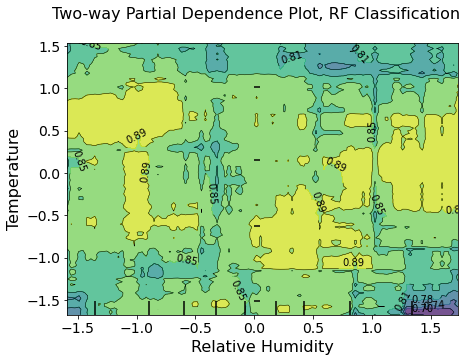

In [ ]:
# PDP interact for two features with contour plot
PartialDependenceDisplay.from_estimator(rf_clf, X_test_scl,  [('Relative Humidity', 'Temperature')], feature_names=X, n_jobs=-1)

fig2 = plt.gcf()
fig2.set_size_inches(7, 5)
fig2.suptitle('Two-way Partial Dependence Plot, RF Classification')
plt.savefig("rf_pdp1.png", dpi=150, bbox_inches='tight')